# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [74]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

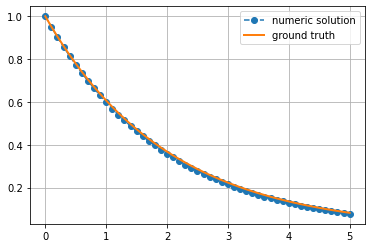

In [76]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

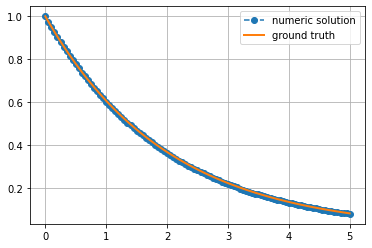

In [77]:
# dt = 0.05
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.05)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

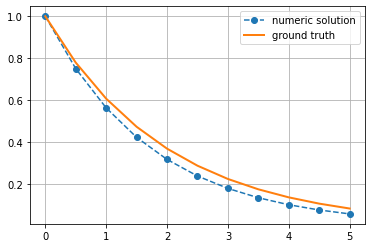

In [78]:
# dt = 0.5
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.5)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

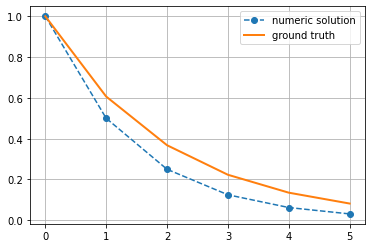

In [79]:
# dt = 1
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

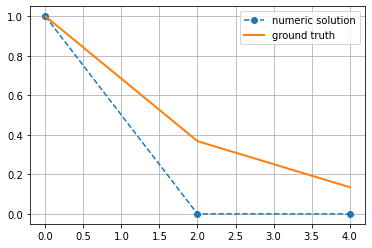

In [80]:
# dt = 2
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=2)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

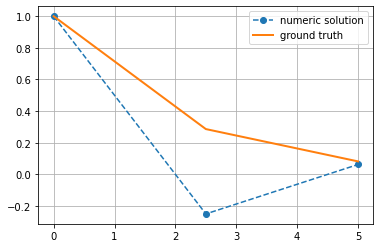

In [81]:
# dt = 2.5
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=2.5)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

We notice that if we increase dt, the fit between solution and truth becomes worse!

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

In [82]:
# implicit Euler
def im_euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] / (1 - dt*lam) # change this line
    return tt, y

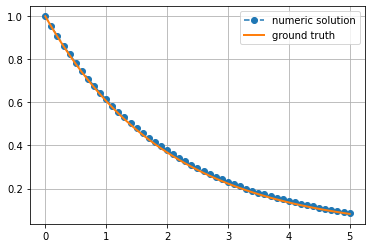

In [83]:
# dt = 0.5
lam = -0.5
tt, y = im_euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

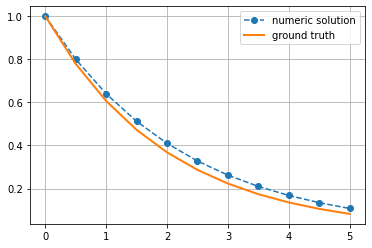

In [84]:
# dt = 0.5
lam = -0.5
tt, y = im_euler_solve(lam, u0=1.0, T=5, dt=0.5)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

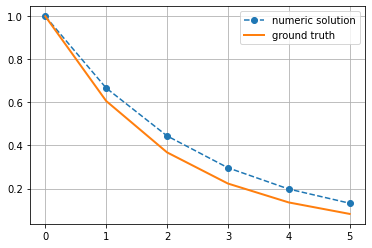

In [85]:
# dt = 1
lam = -0.5
tt, y = im_euler_solve(lam, u0=1.0, T=5, dt=1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

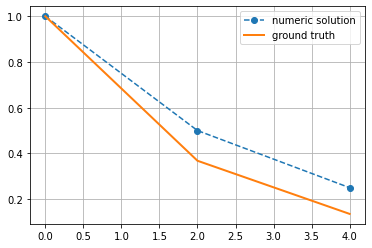

In [86]:
# dt = 2
lam = -0.5
tt, y = im_euler_solve(lam, u0=1.0, T=5, dt=2)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

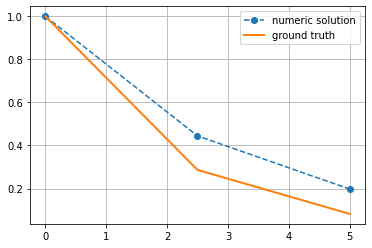

In [87]:
# dt = 2.5
lam = -0.5
tt, y = im_euler_solve(lam, u0=1.0, T=5, dt=2.5)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

We notice that implicit Euler scheme is more stable than the explicit one. <br>
This is because implicit Euler scheme is absolutely stable while explicit Euler scheme is only stable conditionally. <br>
Also, the numeric solution we got from the implicit method tends to overestimate, while that from the explicit method tends to underestimate!

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [88]:
# Systems of first-order ODEs
def sys_euler_solve(A, u, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    dim = len(A)
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    Y = np.empty([dim, num_steps+1])
    Y[0, 0] = u[0, 0]
    Y[1, 0] = u[1, 0]
    for k in range(num_steps):
        Y[:, k+1] = Y[:, k] + dt*np.dot(A, Y[:, k])
    return tt, Y

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stiff.

(20% of the grade)

In [89]:
# find the eigenvalues of A
e = np.linalg.eigvals(A)
print(e)

# check if A the system is stiff
largest = np.max(np.absolute(np.real(e)))
smallest = np.min(np.absolute(np.real(e)))
largest / smallest # >> 1, the system is stiff

[ 10. -10.]


1.0000000000000004

[[ -10   10]
 [  32 -499]]


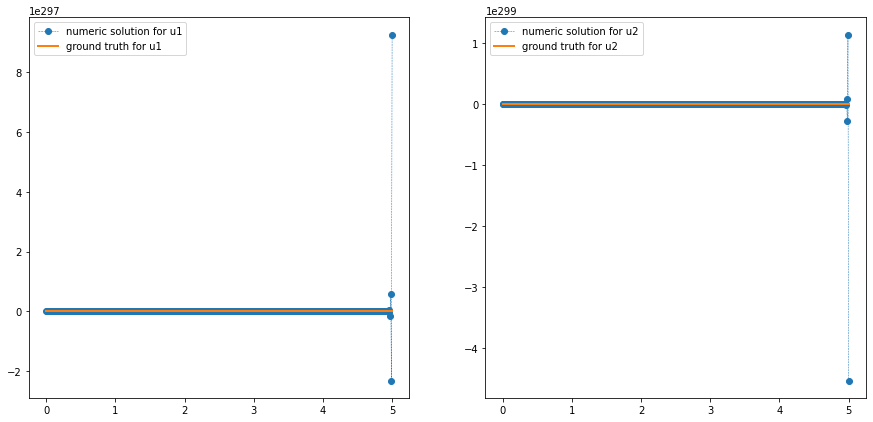

In [90]:
# matrix A, initial conditions
A = np.matrix('-10 10; 32 -499')
print(A)
u0 = np.matrix('1; 0')
tt, Y = sys_euler_solve(A, u0, T=5, dt = 0.01)

fig = plt.figure(figsize = (15, 7))
plt.subplot(1, 2, 1)
plt.plot(tt, Y[0, :], 'o--', lw = 0.5, label='numeric solution for u1')
plt.plot(tt, np.exp(e[0]*tt), '-', lw=2, label='ground truth for u1')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(tt, Y[1, :], 'o--', lw = 0.5, label='numeric solution for u2')
plt.plot(tt, np.exp(e[1]*tt), '-', lw=2, label='ground truth for u2')
plt.legend(loc='best')

plt.show()

It seems that the explicit Euler's method tends to break down!

### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

In [91]:
# Systems of first-order ODEs (Implicit)
def im_sys_euler_solve(A, u, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    dim = len(A)
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    Y = np.empty([dim, num_steps+1])
    Y[0, 0] = u[0, 0]
    Y[1, 0] = u[1, 0]
    # print(Y)
    for k in range(num_steps):
        Y[:, k+1] = np.dot(np.linalg.inv(np.eye(dim, dim) - dt*A), Y[:, k])
        #print(Y)
    return tt, Y

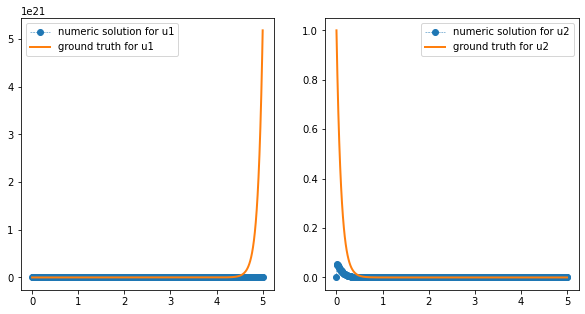

In [92]:
# matrix A, initial conditions
A = np.matrix('-10 10; 32 -499')
u0 = np.matrix('1; 0')
tt, Y = im_sys_euler_solve(A, u0, T=5, dt = 0.01)

fig = plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.plot(tt, Y[0, :], 'o--', lw = 0.5, label='numeric solution for u1')
plt.plot(tt, np.exp(e[0]*tt), '-', lw=2, label='ground truth for u1')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(tt, Y[1, :], 'o--', lw = 0.5, label='numeric solution for u2')
plt.plot(tt, np.exp(e[1]*tt), '-', lw=2, label='ground truth for u2')
plt.legend(loc='best')

plt.show()

In [93]:
Implicit Euler works much better than the explicit one!

SyntaxError: invalid syntax (<ipython-input-93-e88c9849ae86>, line 1)

# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

Let $v = u'(t)$, then we have

$$
u' = v
$$
and 
$$
v' = -w^2 u
$$

So we rewrite the second-order ODE as a system of first-order ODEs.

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$
where
$$
\mathbf{u} = \begin{bmatrix} u \\ v \end{bmatrix}
$$
and
$$
A = \begin{bmatrix} 0 & 1 \\ -w^2 & 0 \end{bmatrix}

[[1.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  1.08694442e-322 2.12199579e-312]
 [0.00000000e+000 0.00000000e+000 1.08694442e-322 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]]


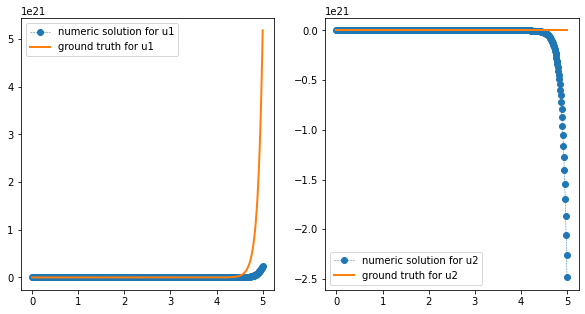

In [73]:
# assume w = 10, u = [1, 0]
A = np.matrix('0 -1; -100 0')
u0 = np.matrix('1; 0')
tt, Y = sys_euler_solve(A, u0, T=5, dt = 0.01)
# find the eigenvalues of A
e = np.linalg.eigvals(A)

# check if A the system is stiff
largest = np.max(np.absolute(np.real(e)))
smallest = np.min(np.absolute(np.real(e)))
# largest / smallest >> 1, the system is stiff

fig = plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.plot(tt, Y[0, :], 'o--', lw = 0.5, label='numeric solution for u1')
plt.plot(tt, np.exp(e[0]*tt), '-', lw=2, label='ground truth for u1')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(tt, Y[1, :], 'o--', lw = 0.5, label='numeric solution for u2')
plt.plot(tt, np.exp(e[1]*tt), '-', lw=2, label='ground truth for u2')
plt.legend(loc='best')


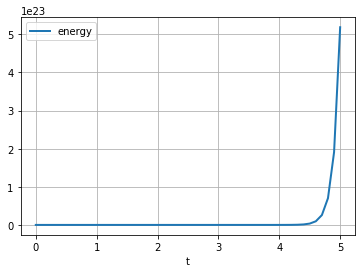

In [72]:
# Converve Energy? No!
plt.plot(tt, ((e[1] * np.exp(e[1]*tt)) ** 2 + np.exp(e[0]*tt)*2 * 100) / 2, '-', lw=2, label='energy')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [ ]:
### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

In [68]:
# 2nd Order Runge-Kutta Scheme
def pend(y, t):
    return np.array([y[1], -100*y[0]])
def rungekutta2(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        y[i+1] = y[i] + h * f(y[i] + f(y[i], t[i]) * h / 2., t[i] + h / 2.)
    return y

y0 = np.array([np.pi - 0.1, 0.0])
t = np.linspace(0, 5, 501)
sol = rungekutta2(pend, y0, t)
# print(sol)

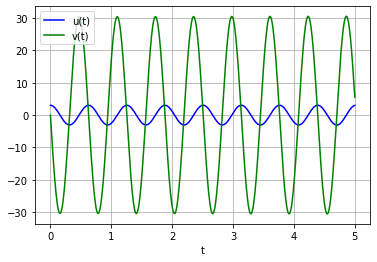

In [69]:
plt.plot(t, sol[:, 0], 'b', label='u(t)')
plt.plot(t, sol[:, 1], 'g', label='v(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

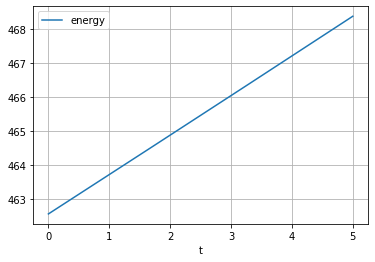

In [95]:
# Converve Energy? No!
plt.plot(t, (sol[:, 1]**2 + 100 * (sol[:, 0] ** 2)) / 2, label='energy')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()